In [13]:
from pyscf import gto, scf, mp
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = np.load("data/md_h2.npz", allow_pickle=True)
R = data["R"][0]
mol_data = [[6, x.tolist()] for x in R]
mol_data
mol = gto.M()
mol.basis = "ccpvdz"
mol.unit = "B"
mol.atom = mol_data
mol.build()

In [15]:
hf = scf.RHF(mol)
hf_energy = hf.kernel(vebose=0)
mp2 = mp.MP2(hf)
mp2_energy = mp2.kernel()

converged SCF energy = -71.8885879692081
E(MP2) = -72.0596586858251  E_corr = -0.171070716616921
E(SCS-MP2) = -72.0574706025597  E_corr = -0.168882633351552


In [16]:
hf_1rdm = hf.make_rdm1()
mo_coeff = hf.mo_coeff
#hf_1rdm = np.einsum("ab,ia,jb->ij", hf_1rdm, mo_coeff, mo_coeff)
hf_2rdm = hf.make_rdm2()
hf_2rdm_dummy = (hf_1rdm[:, None, :, None] * hf_1rdm[None, :, None, :]) - (hf_1rdm[None, :, :, None] * hf_1rdm[:, None, None, :])
(np.einsum("aabc->", hf_2rdm_dummy))
np.einsum("aa->", hf_1rdm)

8.860062930357882

In [17]:
mp_1rdm = mp2.make_rdm1()
mp_2rdm = mp2.make_rdm2(ao_repr=True)
mp_1rdm = np.random.random((10, 10))
mp_2rdm_dummy = (mp_1rdm[:, None, :, None] * mp_1rdm[None, :, None, :]) - (mp_1rdm[None, :, :, None] * mp_1rdm[:, None, None, :])
mp_2rdm_dummy.sum()

-8.881784197001252e-16

In [18]:
rand = np.random.random((10, 10))
rand = (rand + rand.T) / 2

In [19]:
test = rand[:, None, :, None] * rand[None, :, None, :] - (rand[None, :, :, None] * rand[:, None, None, :])
test2 = np.zeros((10, 10, 10, 10))
for lambd in range(10):
    for sigma in range(10):
        for mu in range(10):
            for nu in range(10):
                test2[lambd, sigma, mu, nu] = rand[lambd, mu] * rand[sigma, nu] - rand[sigma, mu] * rand[lambd, nu]
test == test2

array([[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  T

In [20]:
test_reshaped = test.reshape((100, 100))

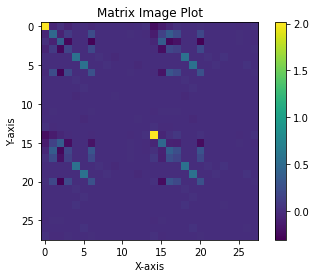

In [21]:
plt.imshow(hf_1rdm, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add a colorbar to the plot
plt.title("Matrix Image Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


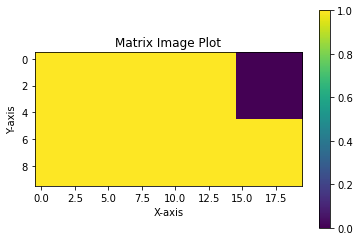

In [31]:
i += 1
test_matrix = np.ones(shape=(10, 20))
test_matrix = test_matrix.reshape((2, 5, 4, 5))
test_matrix = np.transpose(test_matrix, axes=((0, 2, 1, 3)))
test_matrix = test_matrix.reshape((8, 5, 5))
test_matrix[i, :, :] = 0
test_matrix = test_matrix.reshape((2, 4, 5, 5))
test_matrix = np.transpose(test_matrix, axes=((0, 2, 1, 3)))
test_matrix = test_matrix.reshape((10, 20))
plt.imshow(test_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add a colorbar to the plot
plt.title("Matrix Image Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [27]:
i = -1

In [36]:
tens = np.ones(shape=(3,3,3))
tens[:, np.newaxis].shape 

(3, 1, 3, 3)